# 시계열 데이터 분석 (정석)

## #01. 작업준비

### 패키지 참조

In [1]:
from pandas import read_excel,  to_datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import seaborn as sb
import sys
sys.path.append("../../")
from helper88 import set_datetime_index, exp_time_data

### 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 가져오기

In [3]:
df = read_excel("C:/Users/User/Desktop/세종시_친환경차_보급율_현황(2013_2023).xlsx")
df

,년도,전기차(대수),하이브리드(대수),수소(대수),친환경차총합(대수),친환경차외(대수),세종시차량총합(대수),친환경차비율(%)
0,201303,0,235,0,235,49328,49563,0.5
1,201306,0,282,0,282,50394,50676,0.5
2,201309,0,310,0,310,51188,51498,0.6
3,201312,4,346,0,350,52539,52889,0.6
4,201403,4,413,0,417,54975,55392,0.7
5,201406,4,479,0,483,57091,57574,0.8
6,201409,4,508,0,512,60208,60720,0.8
7,201412,4,610,0,614,67267,67881,1.0
8,201503,7,749,0,756,75270,76026,1.0
9,201506,8,855,0,863,80123,80986,1.0


In [4]:
df.columns

Index(['년도', '전기차(대수)', '하이브리드(대수)', '수소(대수)', '친환경차총합(대수)', '친환경차외(대수)',
       '세종시차량총합(대수)', '친환경차비율(%)'],
      dtype='object')

In [5]:
df.dtypes

년도               int64
전기차(대수)          int64
하이브리드(대수)        int64
수소(대수)           int64
친환경차총합(대수)       int64
친환경차외(대수)        int64
세종시차량총합(대수)      int64
친환경차비율(%)      float64
dtype: object

In [6]:
df['년도'] = to_datetime(df['년도'], format="%Y%m")
df

,년도,전기차(대수),하이브리드(대수),수소(대수),친환경차총합(대수),친환경차외(대수),세종시차량총합(대수),친환경차비율(%)
0,2013-03-01,0,235,0,235,49328,49563,0.5
1,2013-06-01,0,282,0,282,50394,50676,0.5
2,2013-09-01,0,310,0,310,51188,51498,0.6
3,2013-12-01,4,346,0,350,52539,52889,0.6
4,2014-03-01,4,413,0,417,54975,55392,0.7
5,2014-06-01,4,479,0,483,57091,57574,0.8
6,2014-09-01,4,508,0,512,60208,60720,0.8
7,2014-12-01,4,610,0,614,67267,67881,1.0
8,2015-03-01,7,749,0,756,75270,76026,1.0
9,2015-06-01,8,855,0,863,80123,80986,1.0


In [7]:
df = set_datetime_index(df,'년도')
df.head()

,전기차(대수),하이브리드(대수),수소(대수),친환경차총합(대수),친환경차외(대수),세종시차량총합(대수),친환경차비율(%)
2013-03-01,0,235,0,235,49328,49563,0.5
2013-06-01,0,282,0,282,50394,50676,0.5
2013-09-01,0,310,0,310,51188,51498,0.6
2013-12-01,4,346,0,350,52539,52889,0.6
2014-03-01,4,413,0,417,54975,55392,0.7


결측치 수: 0


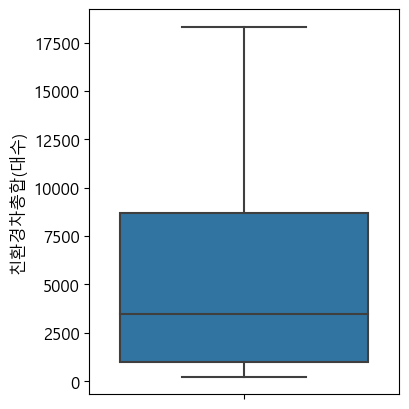

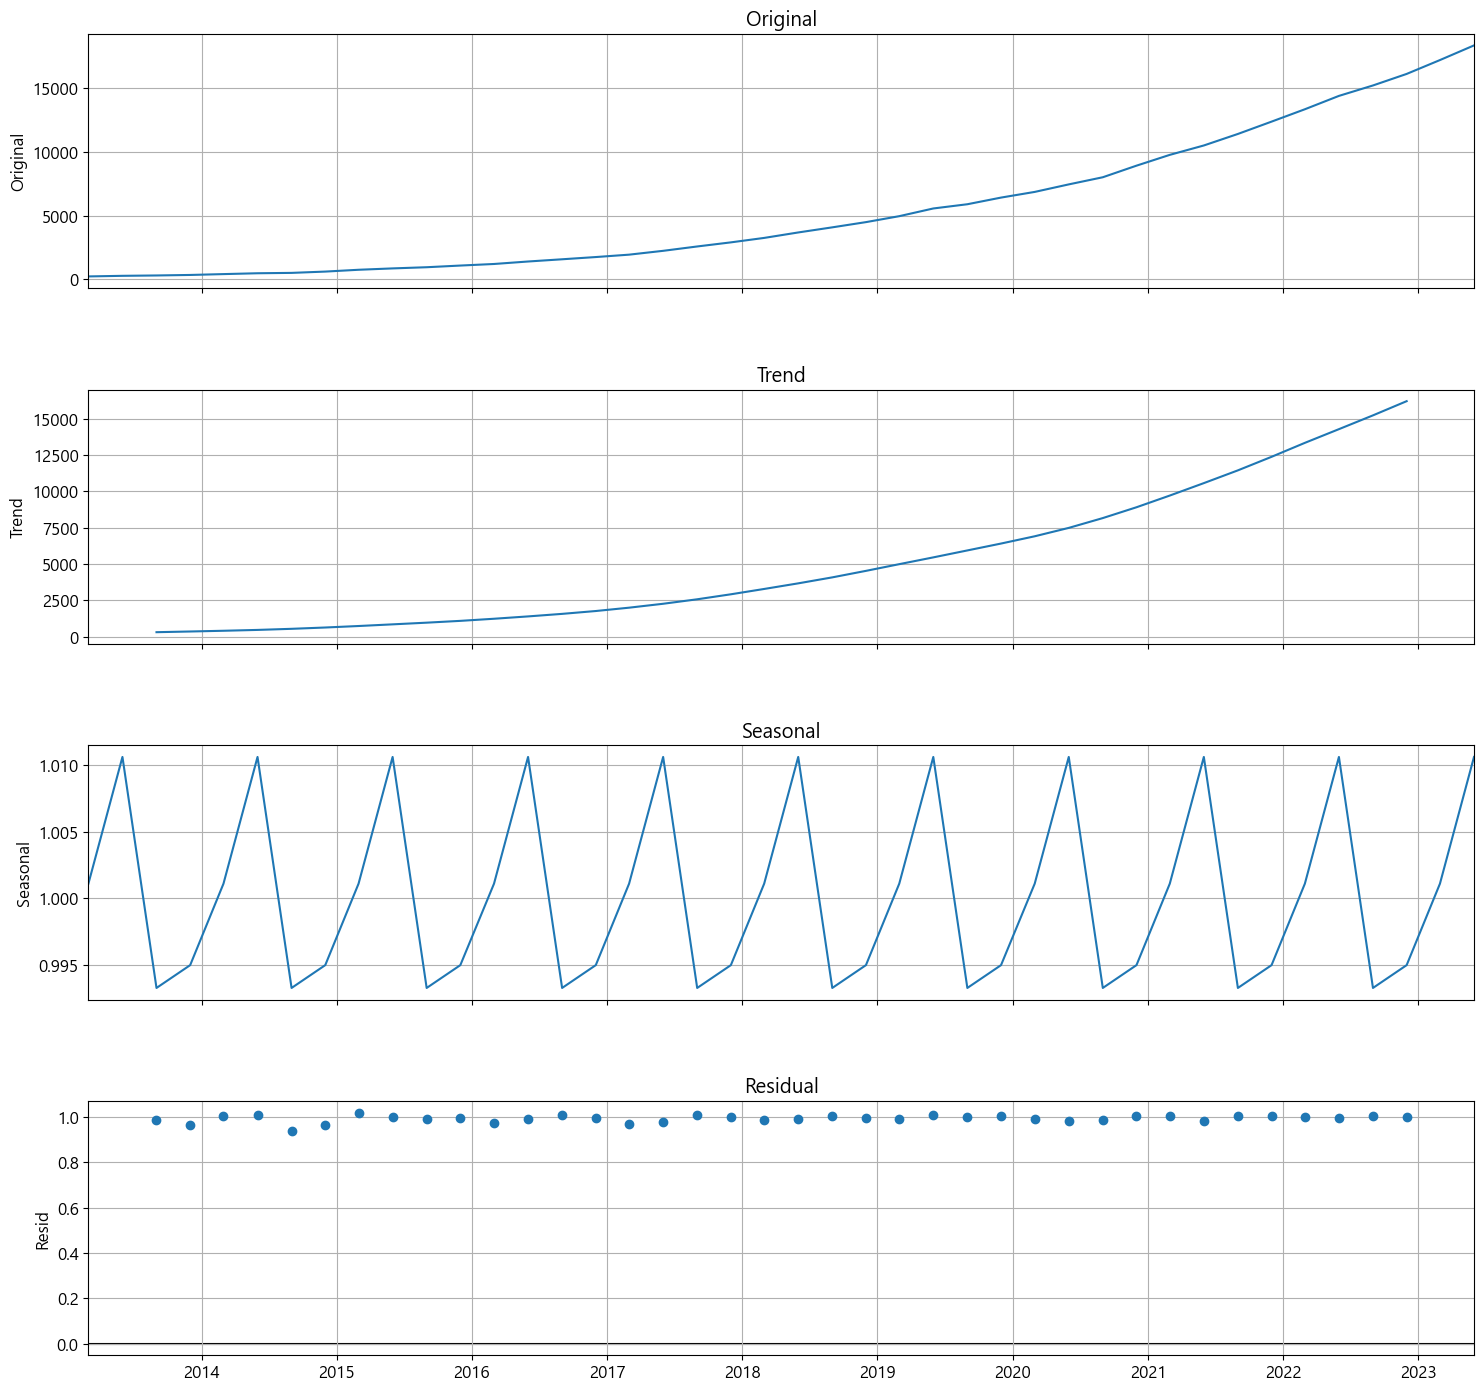

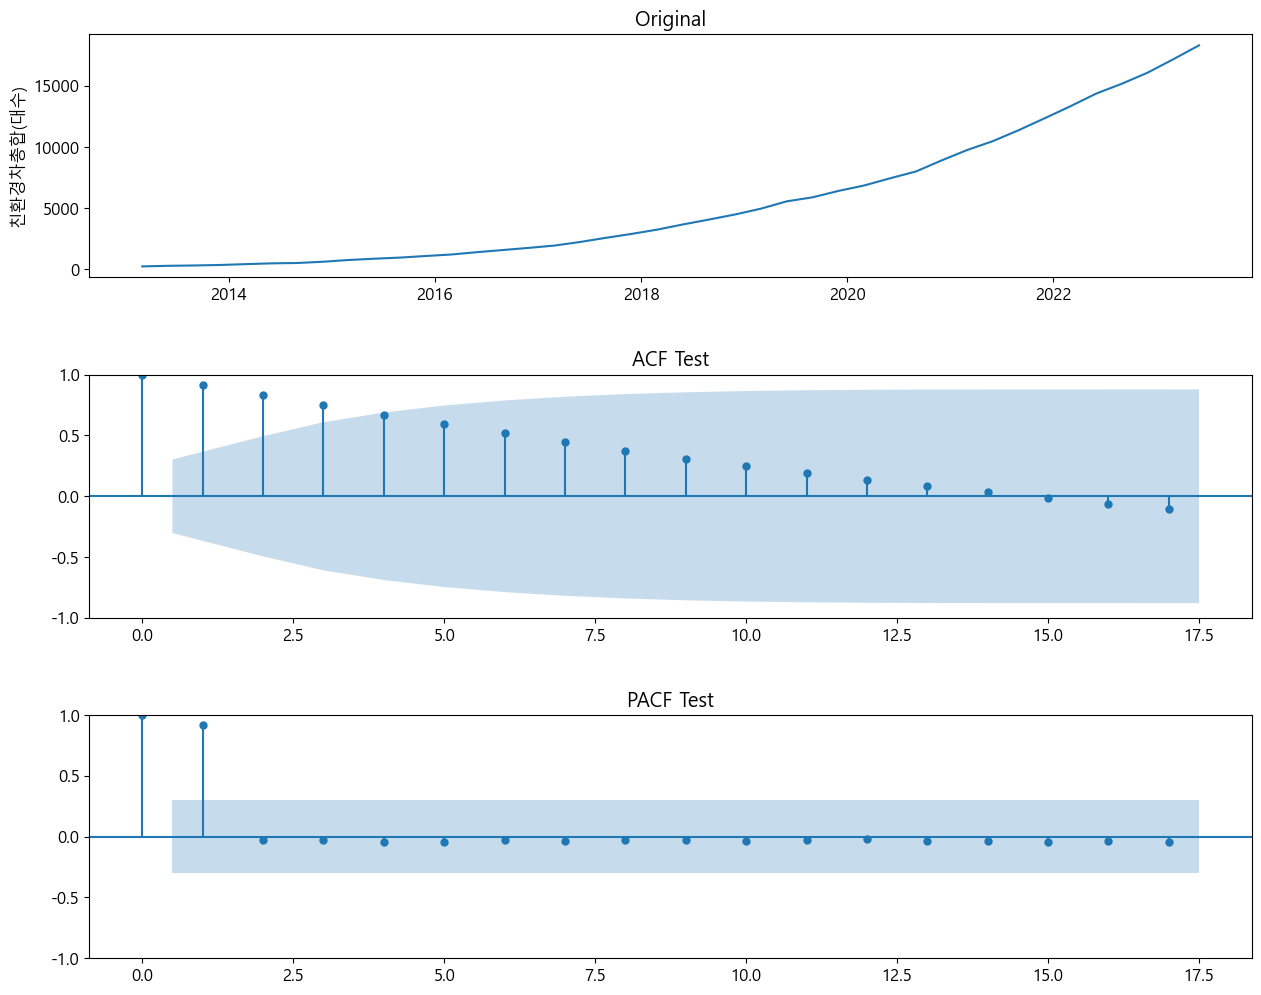

=========== 원본 데이터 ===========
+------------------------------------+----------+
| ADF Test                           |          |
|------------------------------------+----------|
| 검정통계량(ADF Statistic)          |  3.63336 |
| 유의수준(p-value)                  |        1 |
| 최적차수(num of lags)              |        1 |
| 관측치 개수(num of observations)   |       40 |
| 기각값(Critical Values) 1%         | -3.60556 |
| 기각값(Critical Values) 5%         | -2.93707 |
| 기각값(Critical Values) 10%        | -2.60699 |
| 데이터 정상성 여부(0=Flase,1=True) |        0 |
+------------------------------------+----------+
=========== 1차 차분 데이터 ===========
+------------------------------------+----------+
| ADF Test                           |          |
|------------------------------------+----------|
| 검정통계량(ADF Statistic)          |  0.96497 |
| 유의수준(p-value)                  | 0.993882 |
| 최적차수(num of lags)              |        3 |
| 관측치 개수(num of observations)   |       37 |
| 기각값(Critical Values) 1%         | -3

In [8]:
exp_time_data(data=df, yname="친환경차총합(대수)", sd_model='m', max_diff=10)

In [9]:
model = ARIMA(df['친환경차총합(대수)'], order= (1,1,0), seasonal_order=(1,1,0,3))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                      친환경차총합(대수)   No. Observations:                   42
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 3)   Log Likelihood                -234.040
Date:                         Wed, 27 Sep 2023   AIC                            474.079
Time:                                 14:01:10   BIC                            478.992
Sample:                             03-01-2013   HQIC                           475.827
                                  - 06-01-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7551      0.102      7.427      0.000       0.556       0.954
ar.S.L3       -0.6214      0.113     -5.501      0.000     

In [10]:
fv = fit.fittedvalues
fv.head()

2013-03-01      0.000000
2013-06-01    236.735725
2013-09-01    283.095883
2013-12-01    429.190644
2014-03-01    394.458116
Freq: QS-DEC, dtype: float64

In [11]:
fc = fit.forecast(365)
fc.head()

2023-09-01    19444.132935
2023-12-01    20641.003309
2024-03-01    21685.433748
2024-06-01    22749.168932
2024-09-01    23935.583982
Freq: QS-DEC, Name: predicted_mean, dtype: float64

In [12]:
last = df.index.max()
xmin = last-timedelta(days=365)
xmax = last+timedelta(days=365+10)
ymax = df['친환경차총합(대수)'][xmin:xmax].max()
ymin = df['친환경차총합(대수)'][xmin:xmax].min()
xmin, xmax, ymax, ymin

(Timestamp('2022-06-01 00:00:00'),
 Timestamp('2024-06-10 00:00:00'),
 18321,
 14368)

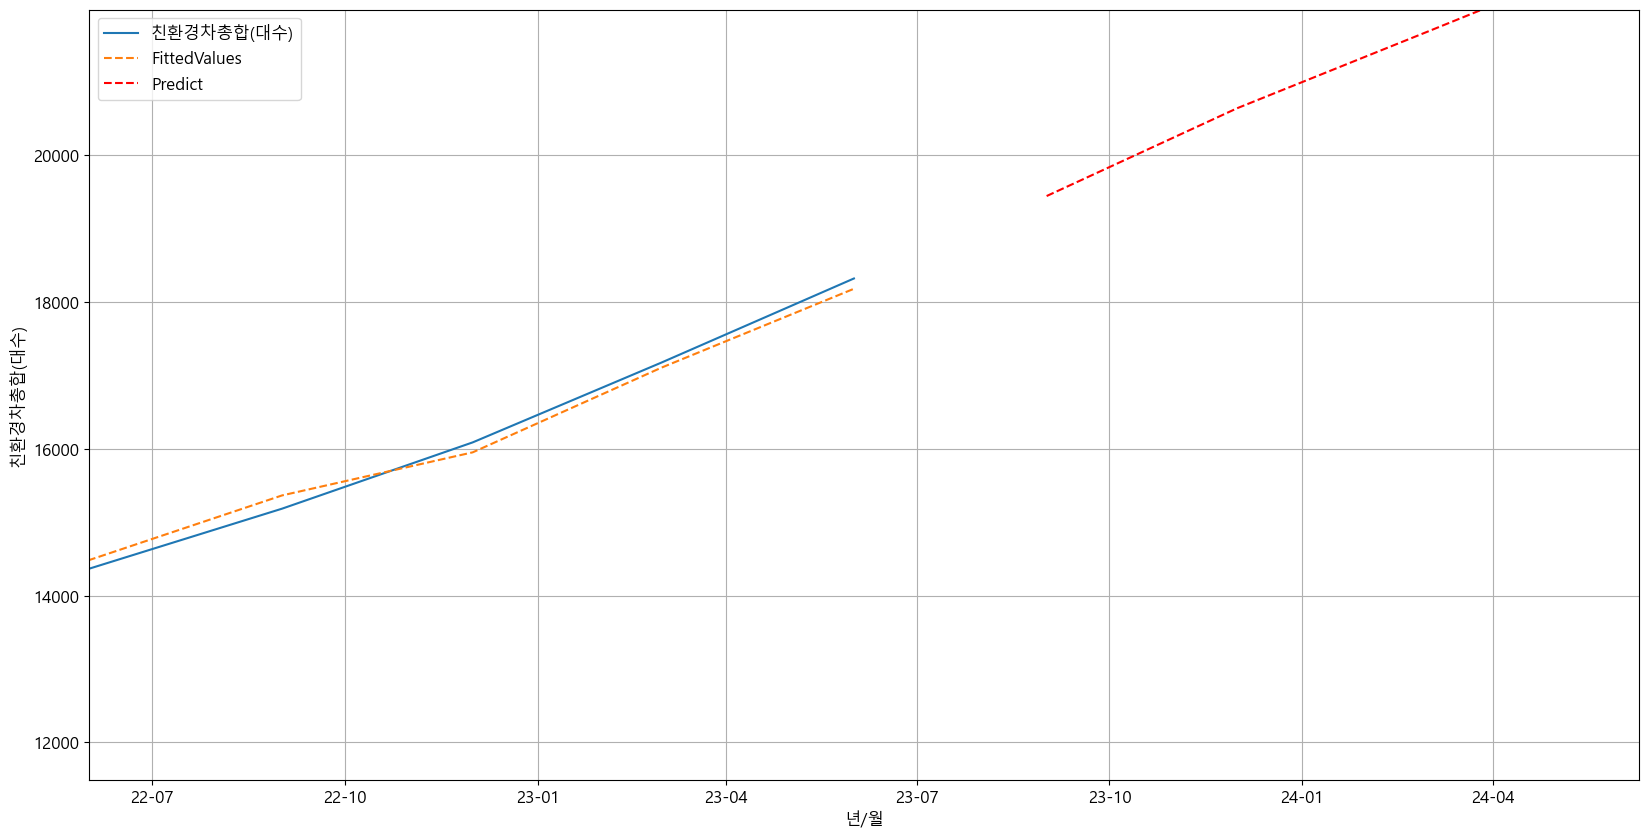

In [13]:
plt.figure(figsize=(20,10))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='친환경차총합(대수)', label='친환경차총합(대수)')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 향후 1년간의 예측값
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('년/월')
plt.ylabel('친환경차총합(대수)')
plt.legend()

plt.xlim([xmin, xmax])
plt.ylim([ymin * 0.8, ymax*1.2])

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

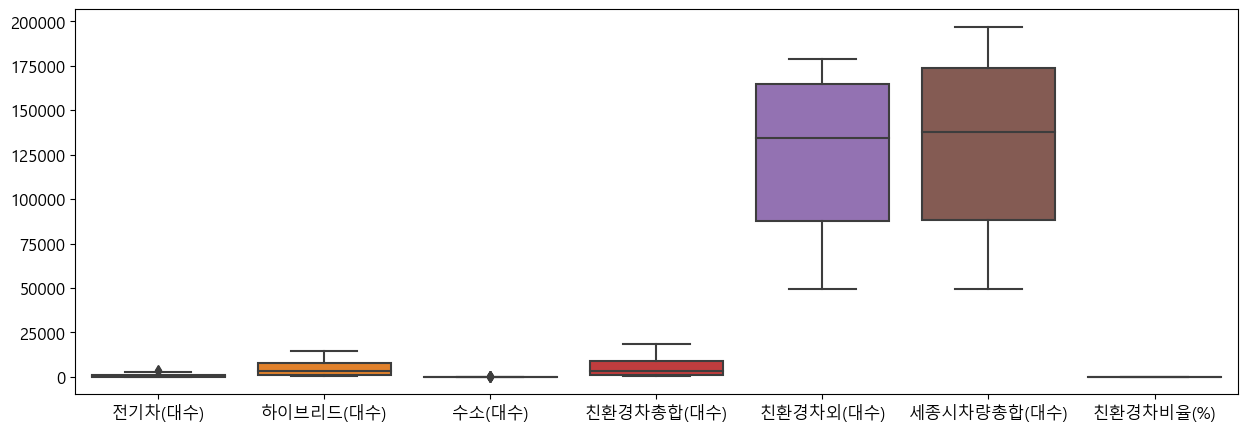

In [14]:
plt.figure(figsize=(15, 5))
sb.boxplot(data=df)
plt.show()
plt.close()

## #02. ARIMA 분석 수행

시계열 데이터를 계절 ARIMA 모델에 맞추려고 할 때 첫 번째 목표는 측정항목을 최적화하는 ARIMA(p,d,q)(P,D,Q)s 값을 찾는 것

### 학습 결과에 대한 예측값 생성

In [15]:
start_index = 0
end_index = len(df['친환경차총합(대수)'])
pd = fit.predict(start=start_index, end=end_index)
pd

2013-03-01        0.000000
2013-06-01      236.735725
2013-09-01      283.095883
2013-12-01      429.190644
2014-03-01      394.458116
2014-06-01      456.706496
2014-09-01      545.483586
2014-12-01      564.710909
2015-03-01      692.200530
2015-06-01      867.053970
2015-09-01      996.988776
2015-12-01     1058.646048
2016-03-01     1171.886042
2016-06-01     1355.894549
2016-09-01     1613.164476
2016-12-01     1717.366224
2017-03-01     1929.391789
2017-06-01     2128.854666
2017-09-01     2497.008248
2017-12-01     2921.097498
2018-03-01     3220.605670
2018-06-01     3583.971506
2018-09-01     4057.563684
2018-12-01     4518.080873
2019-03-01     4927.859022
2019-06-01     5372.712401
2019-09-01     6117.072542
2019-12-01     6297.020194
2020-03-01     6943.689012
2020-06-01     7205.656411
2020-09-01     8085.043613
2020-12-01     8596.301695
2021-03-01     9609.693376
2021-06-01    10602.508852
2021-09-01    11257.027665
2021-12-01    12288.775244
2022-03-01    13190.082820
2

### 이후 10 단계의 예측값 생성

In [16]:
fc = fit.forecast(10)
fc

2023-09-01    19444.132935
2023-12-01    20641.003309
2024-03-01    21685.433748
2024-06-01    22749.168932
2024-09-01    23935.583982
2024-12-01    25087.877101
2025-03-01    26221.842300
2025-06-01    27439.915244
2025-09-01    28544.183321
2025-12-01    29648.855189
Freq: QS-DEC, Name: predicted_mean, dtype: float64

### 관측치와 예측치의 비교 결과 시각화

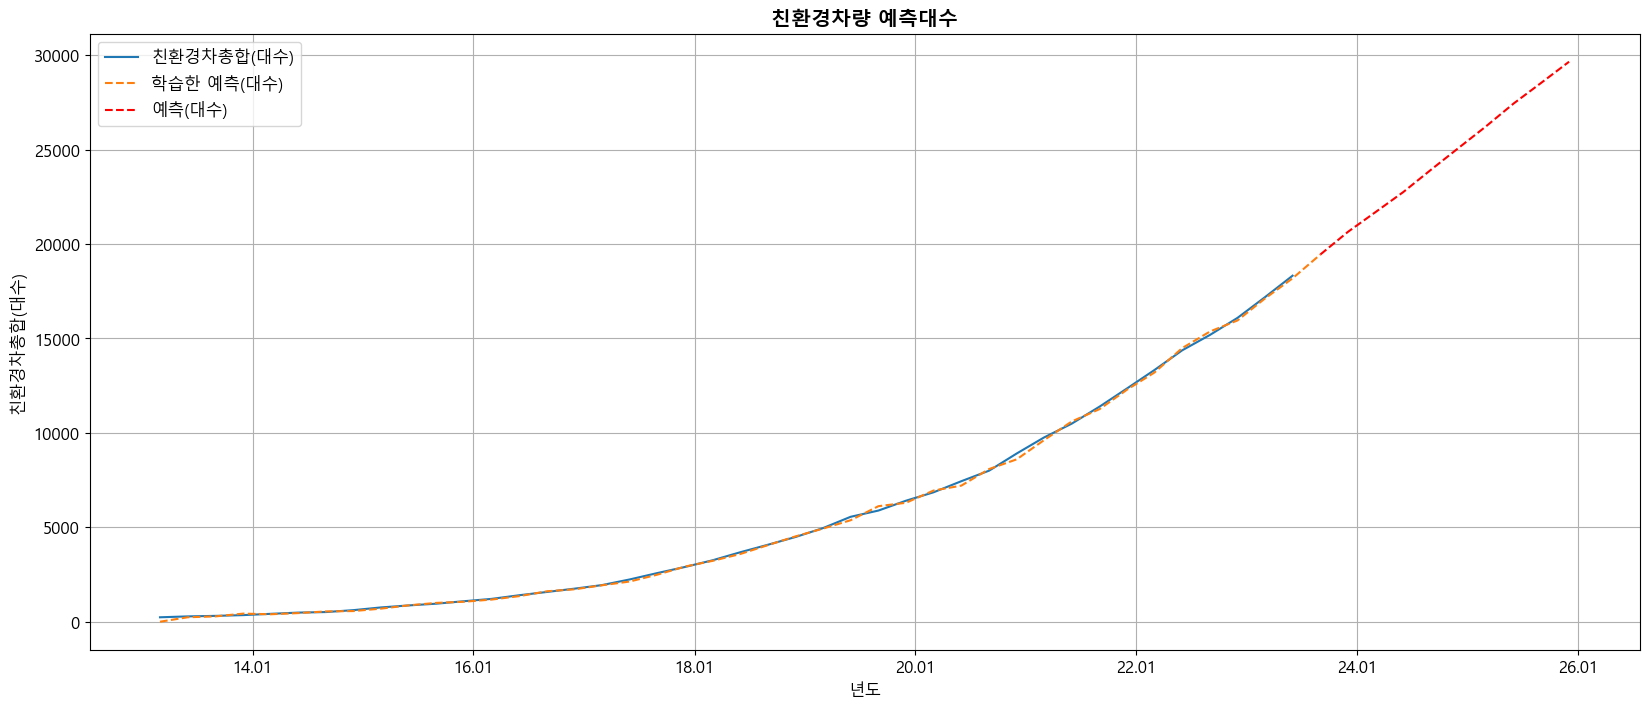

In [19]:
plt.figure(figsize=(20,8))
plt.title('친환경차량 예측대수',  fontweight = "bold")
# 원본
sb.lineplot(x=df.index, y=df['친환경차총합(대수)'], label='친환경차총합(대수)')

# 원본을 토대로 학습하여 예측한 값
sb.lineplot(x=pd.index, y=pd, label='학습한 예측(대수)', linestyle='--')


sb.lineplot(x=fc.index, y=fc, label='예측(대수)', linestyle='--', color='red')

plt.xlabel('년도')
plt.ylabel('친환경차총합(대수)')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()